In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X=np.array(np.arange(1,21).reshape(2,10))
X
y=np.array([1,1,1,1,1,-1,-1,-1,-1,-1])

array(['green', 'green', 'green', 'green', 'green', 'red', 'red', 'red',
       'red', 'red'], dtype='<U5')

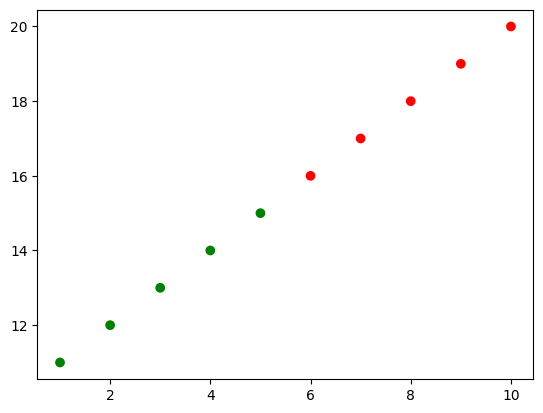

In [ ]:
color_y= np.where(y==1,'green','red')
plt.scatter(X[0,:],X[1,:],c=color_y)
color_y

In [ ]:
#perceptron
d,n=X.shape
w=np.zeros(d)
converged=False
while not converged:
  for i in range(n):
    y_hat= 1 if w@X[:,i]>=0 else -1
    if y_hat !=y[i]:
      w=w+X[:,i]*y[i]
  y_pred=np.where(w@X>=0,1,-1)
  if np.array_equal(y_pred,y):
    converged=True
w

array([-22.,   8.])

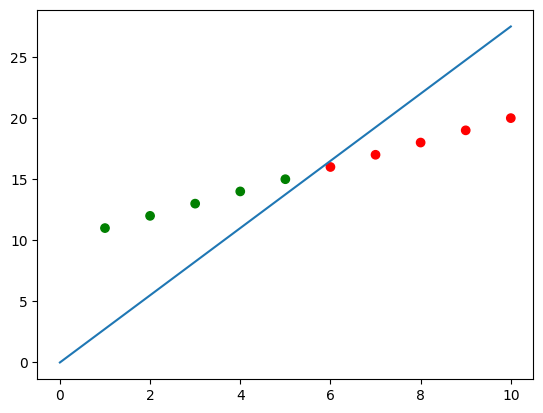

In [ ]:
plt.scatter(X[0,:],X[1,:],c=color_y)
x_db=np.linspace(0,10)
y_db=-w[0]/w[1]*x_db

plt.plot(x_db,y_db)

In [ ]:
Y=np.diag(y)

In [ ]:
from scipy import optimize

In [ ]:
Q=Y.T@X.T@X@Y
def f(alpha):
  return 0.5*alpha @ Q @ alpha- alpha.sum()

In [ ]:
alpha_int=np.zeros(n)
result= optimize.minimize(f,alpha_int,bounds=optimize.Bounds(0,np.inf))
result

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -5.409999995688832
        x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  5.620e+00
             5.200e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
      nit: 49
      jac: [ 8.000e+00  6.000e+00  4.000e+00  2.000e+00  0.000e+00
             0.000e+00  2.000e+00  4.000e+00  6.000e+00  8.000e+00]
     nfev: 759
     njev: 69
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>

In [ ]:
X_support=X[:,result.x>0]
X_support

array([[ 5,  6],
       [15, 16]])

In [ ]:
w_star=X@Y@result.x
w_star

array([-3.10008723,  1.10003183])

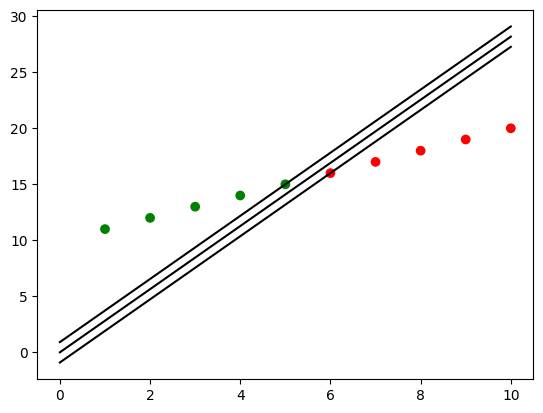

In [ ]:
plt.scatter(X[0,:],X[1,:],c=color_y)
x_db=np.linspace(0,10)
y_db_svm=-w_star[0]/w_star[1]*x_db
y_db_per=-w[0]/w[1]*x_db


plt.plot(x_db,y_db_svm,color='black')
# plt.plot(x_db,y_db_per,color='purple')
plt.plot(x_db,1/w_star[1]-w_star[0]/w_star[1]*x_db,color='black')
plt.plot(x_db,-1/+qw_star[1]-w_star[0]/w_star[1]*x_db,color='black')


In [ ]:
def s_svm(X,y,C):
  d,n=X.shape
  Y=np.diag(y)
  Q=Y.T@X.T@X@Y
  def f(alpha):
    return 0.5*alpha @ Q @ alpha- alpha.sum()
  alpha_int=np.zeros(n)
  result= optimize.minimize(f,alpha_int,bounds=optimize.Bounds(0,C))
  alpha_star=result.x
  w_star=X@Y@alpha_star
  support_vector=X[:,alpha_star>0]
  return alpha_star,w_star,support_vector


In [ ]:
def plot1(X,y,w_star,C):
  colors=np.array(['','green','red'])
  plt.scatter(X[0,:],X[1,:],c=colors[y])
  x_db=np.linspace(1,10)
  plt.plot(x_db,-w_star[0]/w_star[1]*x_db,color='black')
  plt.plot(x_db,1/w_star[1]-w_star[0]/w_star[1]*x_db,color='black')
  plt.plot(x_db,-1/w_star[1]-w_star[0]/w_star[1]*x_db,color='black')
  plt.show()

In [ ]:
alpha_star,w_star,support_vector=ssvm(X,y,0.1)
alpha_star

array([0.        , 0.02221239, 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.05555006, 0.        , 0.        ])

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.00909502 0.01      ]


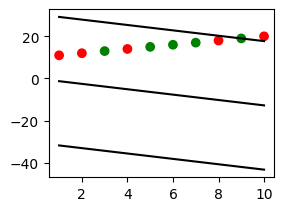

[0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.07058823 0.1       ]


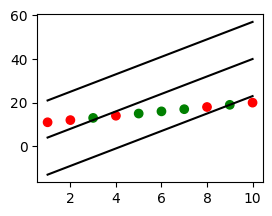

[0.47812503 1.         1.         1.         1.         1.
 1.         1.         0.42812502 1.        ]


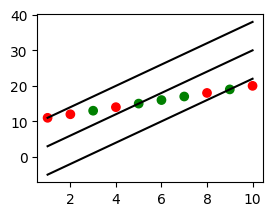

[3.68170882 3.80897568 4.39497266 4.0635078  4.14043788 4.01316975
 3.88590116 4.57257283 3.63136388 4.82710413]


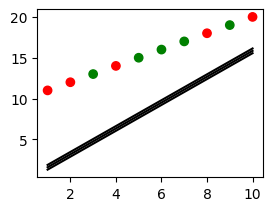

In [ ]:
X=np.arange(1,21).reshape(2,10)
count=1
y=np.array([-1,-1,1,-1,1,1,1,-1,1,-1])
for C in [0.01,0.1,1,10]:
  alpha_star,w_star,support_vector=s_svm(X,y,C)
  print(alpha_star)
  plt.subplot(2,2,count)
  plot1(X,y,w_star,C)
  count+=1

  # print(alpha_star)
  # print(w_star)
  # print(support_vector)
